# Challenge 3

In [3]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [4]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [5]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [6]:
# your code here- numerical variable
titanic.select_dtypes(exclude = ['object']).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [7]:
#your code here- categorical variable
titanic.select_dtypes(include = ['object']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [8]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

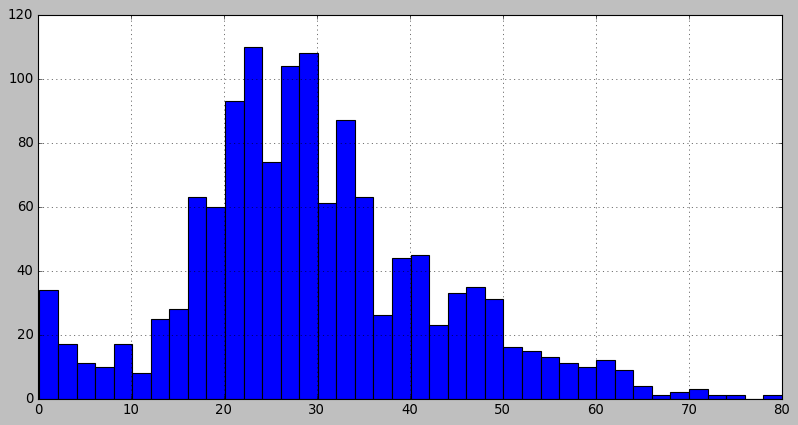

In [9]:
# your code here
titanic['Age'].hist(bins = 40)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

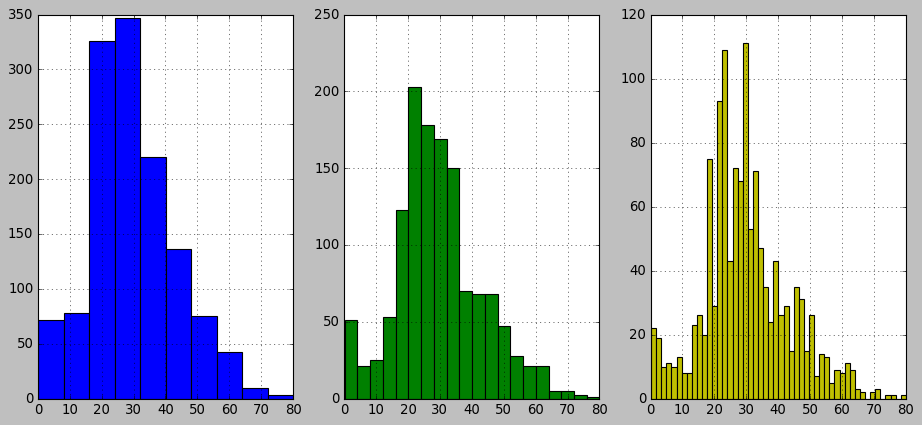

In [29]:
# your code here
plt.rcParams['figure.figsize'] = (14, 6)
plt.subplots_adjust(wspace = 0.2 )

plt.subplot(1,3,1)
titanic['Age'].hist()

plt.subplot(1,3,2)
titanic['Age'].hist(bins = 20, color = 'g')

plt.subplot(1,3,3)
titanic['Age'].hist(bins = 50, color = 'y')

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
# Mientras el bin sea mayor más precisión tiene la gráfica al representar los datos

#### Use seaborn to show the distribution of the column `Age`

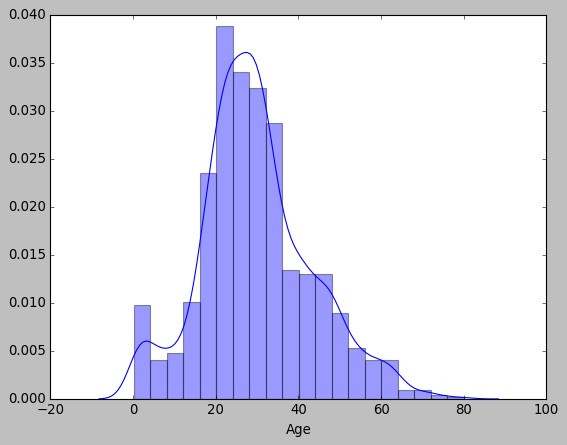

In [8]:
# your code here
sns.distplot(titanic['Age'], bins = 20)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

Text(0, 0.5, 'Cantidad')

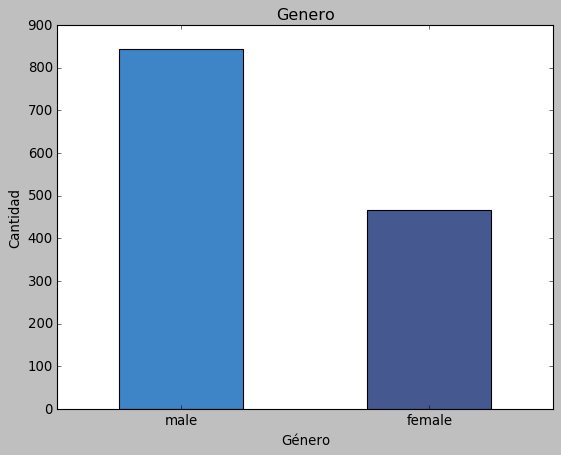

In [10]:
# your code here- 1st way
valores = titanic['Gender'].value_counts()
colores = ('#3D85C6', '#455890')
valores.plot(kind = 'bar', color = colores, rot = 0, title = 'Genero')
plt.xlabel('Género')
plt.ylabel('Cantidad')

Text(0.5, 1.0, 'Género')

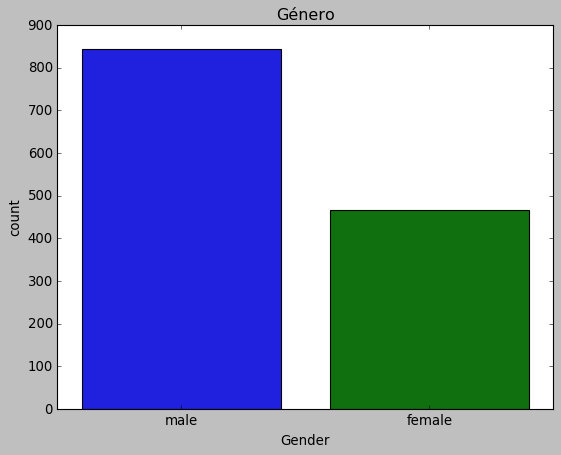

In [11]:
# your code here- 2nd way
sns.countplot(x = 'Gender', data = titanic)
ax = plt.gca()
ax.set_title('Género')

#### Use the appropriate plot to visualize the column `Pclass` 


Text(0.5, 1.0, 'Clases')

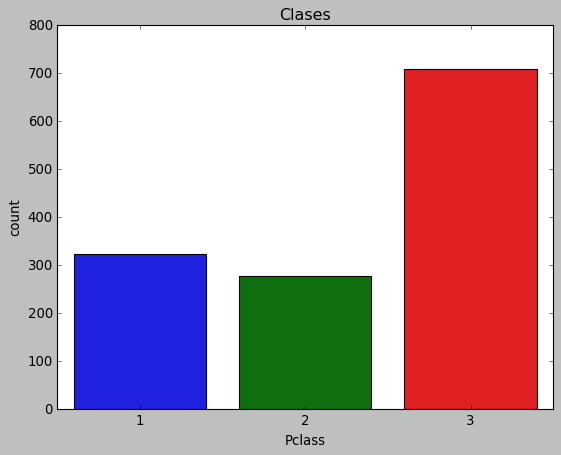

In [12]:
# your code here
sns.countplot(x = 'Pclass', data = titanic)
ax = plt.gca()
ax.set_title('Clases')

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31ce972b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31ce972eb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31ce972780>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31ce97c9b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31ce97cd30>],
 'means': []}

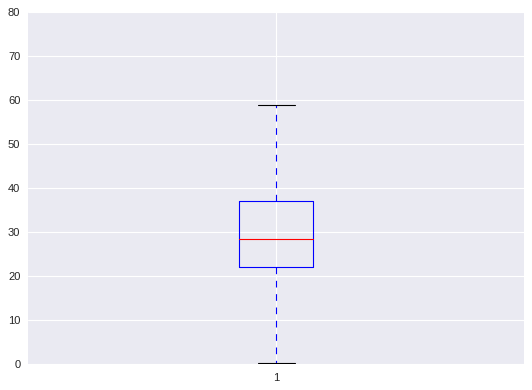

In [20]:
# your code here
plt.style.use('seaborn')
plt.boxplot(titanic['Age'])

#### What does the previous plot tell you about the feature `Age`? Comment.

In [61]:
# your comment here
# Los valores están concentrados entre algo mayores de 20 y menores de 40, con una mediana próxima a los 30

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

Text(0.5, 1.0, 'Distribución de la edad')

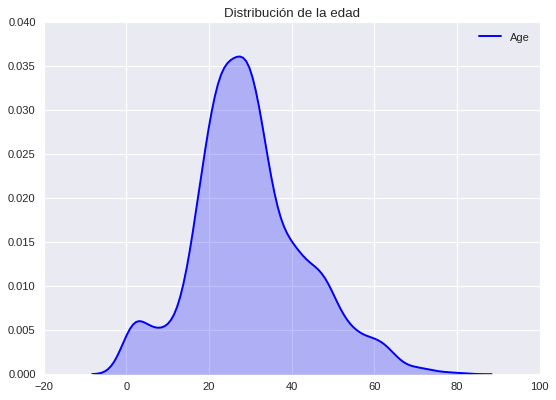

In [26]:
#your code here
sns.kdeplot(titanic['Age'], shade=True, color="b")
ax = plt.gca()
ax.set_title('Distribución de la edad')

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
# Muestra que la edad de los pasajeros se acerca mucho a una distribución normal

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

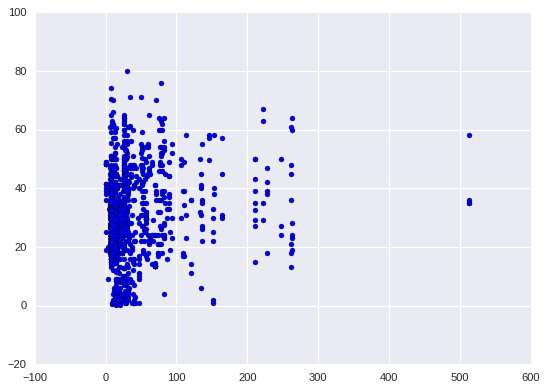

In [63]:
#your code-1st way
plt.scatter(titanic['Fare'], titanic['Age'])

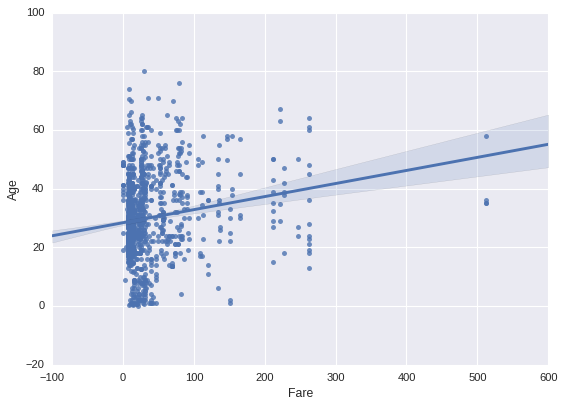

In [66]:
# your code-2nd way
sns.regplot(x = 'Fare', y = 'Age',data = titanic)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

Text(0.5, 1.0, 'Matrix de correlación')

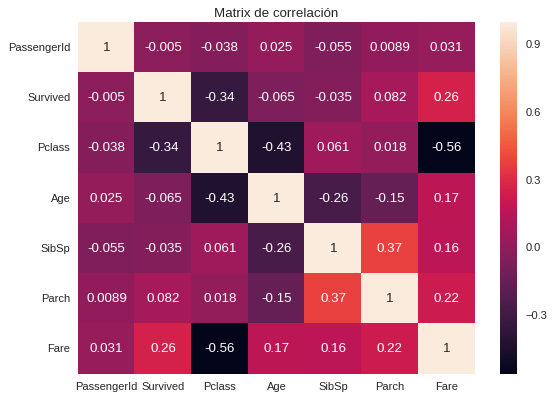

In [67]:
#your code here
#sns.heatmap(titanic.corr(), vmin = 0, vmax = 1)
sns.heatmap(titanic.corr(), annot=True)
plt.title('Matrix de correlación')

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
#las que están más correlacionadas Parch y SibSP (0.37) niños y hermanos?

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

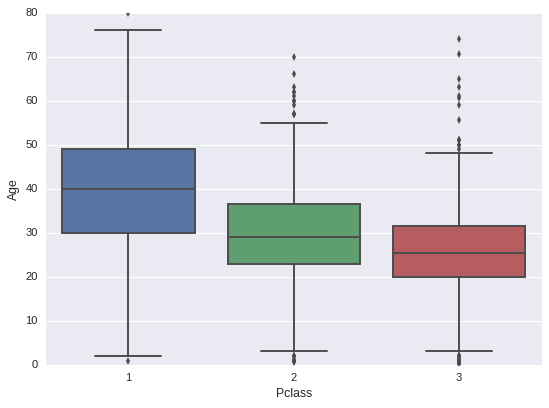

In [68]:
#your code here
sns.boxplot(x = 'Pclass',y = 'Age', data = titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

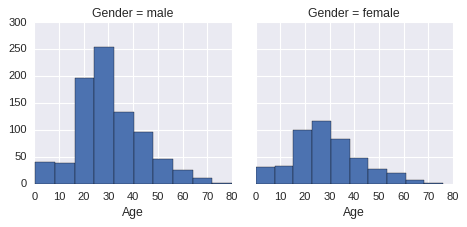

In [73]:
#your code here
g = sns.FacetGrid(data = titanic, col = 'Gender')
g = g.map(plt.hist, 'Age')